In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from Scores import *
from create_dataframe import *
from create_dataframe_regression import * 
from logistic_regression import *
import time
import warnings
warnings.filterwarnings("ignore")
from Random_forest import *
from GradientBoosting import *
from logistic_regression_l2 import * 
#from logistic_regression_optimise import * 


In [2]:
dfreg = pd.read_csv("dataframe_regression.csv")

In [3]:
dfreg

,Unnamed: 0,sender_id,receiver_id,receveur_potentiel,passe,passe_id,score1_distance,score2,score3,score4,premiere_distance_receveur,seconde_distance_receveur,premiere_distance_sender,seconde_distance_sender,distance_ligne_passe,adversaire_dans_cone,Direction_Passe
0,0,26,18,1,0,1,2392.822601,2392.822601,2392.822601,1690.822601,2652.168924,2697.572983,814.923309,852.349693,1393.417129,0,1
1,1,11,14,1,0,2,1198.540779,2098.540779,2098.540779,1777.540779,502.493781,1884.701568,1388.092216,1646.147017,147.178972,1,1
2,2,4,10,1,0,3,1290.155029,2190.155029,2190.155029,2184.155029,330.151480,910.659102,297.321375,960.052082,4.883134,1,1
3,3,12,7,1,0,4,600.083328,1500.083328,1500.083328,1428.083328,50.000000,700.642562,370.000000,648.845128,11.498403,1,1
4,4,15,24,1,0,5,100000.000000,100000.000000,100000.000000,100000.000000,0.000000,0.000000,735.459040,810.246876,0.000000,0,0
5,5,26,18,1,0,6,7481.797912,7481.797912,7481.797912,5240.797912,6570.547922,6946.920181,89.442719,372.155881,80.074336,1,1
6,6,2,1,1,1,7,1218.277472,1218.277472,1218.277472,975.277472,871.435597,876.413145,926.336872,961.873173,97.432648,0,1
7,7,26,18,1,0,8,5307.522963,5307.522963,5307.522963,3786.522963,4005.221592,5286.898902,278.926514,1316.852308,1303.941603,0,1
8,8,14,7,1,0,9,3259.831284,3259.831284,3259.831284,3031.831284,1237.133784,1760.255663,1179.025021,1830.000000,15.276864,1,1
9,9,18,21,1,0,10,2875.621672,2875.621672,2875.621672,2533.621672,1669.730517,2536.178227,1943.656348,2429.855963,1595.341990,0,0


In [4]:
PasFaite=dfreg[dfreg['passe']==0]
Faite=dfreg[dfreg['passe']==1]
np.sum(Faite['adversaire_dans_cone'])

3162

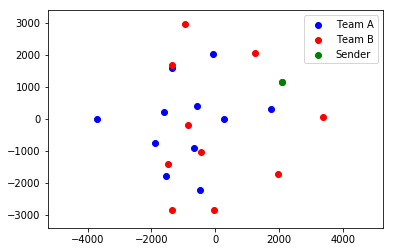

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


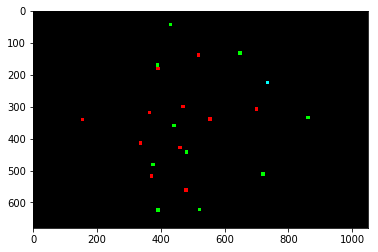

In [2]:
df=pd.read_csv("passes.csv")
df=df.replace(np.nan, 100000)
dfligne=df.iloc[30]
imageC=image(dfligne,True)
plt.imshow(imageC)

<font color='blue'>
On regarde ce que nous renvoie notre fonction directionPasse

Backward


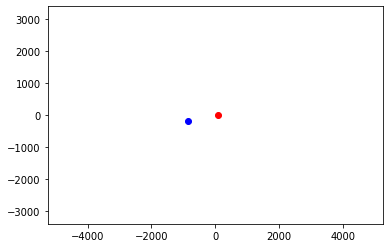

Forward


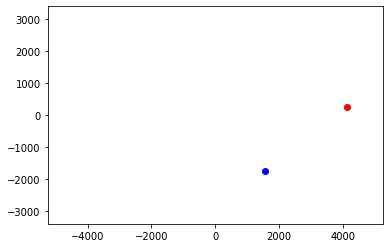

Forward


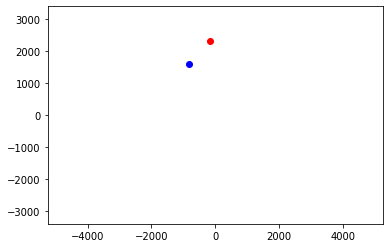

Forward


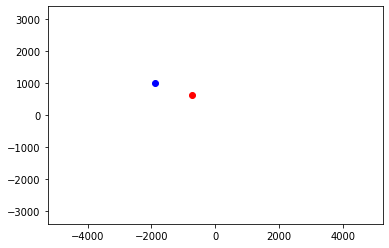

Forward


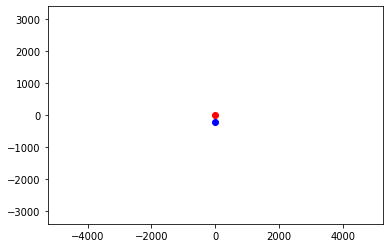

Backward


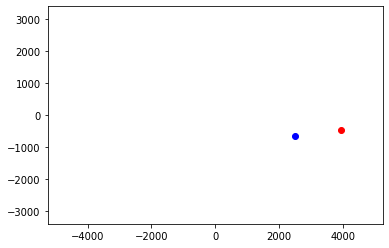

Forward


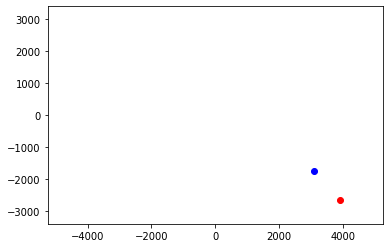

Backward


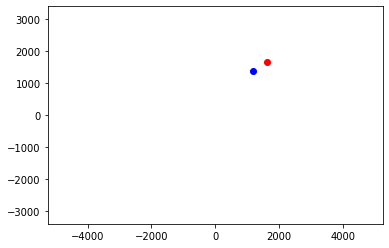

Forward


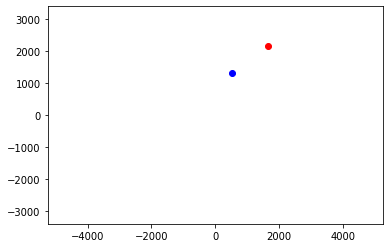

Backward


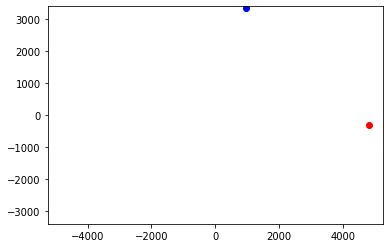

In [29]:
for i in range(10):
    ligne = df.iloc[i]
    sender = df.iloc[i,2]
    receiver = df.iloc[i,3]
    SenderX,SenderY=df.iloc[i,3+sender],df.iloc[i,31+sender]
    ReceiverX,ReceiverY=df.iloc[i,3+receiver],df.iloc[i,31+receiver]
    xmin,xmax,ymin,ymax = -5250, 5250, -3400, 3400
    print(DirectionPasse(ligne))
    plt.scatter(SenderX,SenderY, color='red')
    plt.scatter(ReceiverX,ReceiverY, color='blue')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

<font color='blue'>
Cela semble marcher

<font color='blue'>
  test taux de réussite score1

In [30]:
reussite1 = np.mean(df["predic1"]==df["receiver_id"])
reussite1

0.331507122223329

<font color='blue'>
    score2

In [31]:
reussite2 = np.mean(df["predic2"]==df["receiver_id"])
reussite2

0.39645383006275525

<Font color='blue'>
 score3

In [32]:
reussite3 = np.mean(df["predic3"]==df["receiver_id"])
reussite3

0.39685227612311985

<font color='blue'>
    score4

In [33]:
reussite4 = np.mean(df["predic4"]==df["receiver_id"])
reussite4

0.3831058870405419

<font color = blue>
Ici on crée le dataframe pour la régression logistique

In [4]:
dfreg

,Unnamed: 0,sender_id,receiver_id,receveur_potentiel,passe,passe_id,score1_distance,score2,score3,score4,premiere_distance_receveur,seconde_distance_receveur,premiere_distance_sender,seconde_distance_sender,distance_ligne_passe,adversaire_dans_cone,Direction_Passe
0,0,26,18,1,0,1,2392.822601,2392.822601,2392.822601,1690.822601,2652.168924,2697.572983,814.923309,852.349693,1393.417129,0,1
1,1,11,14,1,0,2,1198.540779,2098.540779,2098.540779,1777.540779,502.493781,1884.701568,1388.092216,1646.147017,147.178972,1,1
2,2,4,10,1,0,3,1290.155029,2190.155029,2190.155029,2184.155029,330.151480,910.659102,297.321375,960.052082,4.883134,1,1
3,3,12,7,1,0,4,600.083328,1500.083328,1500.083328,1428.083328,50.000000,700.642562,370.000000,648.845128,11.498403,1,1
4,4,15,24,1,0,5,100000.000000,100000.000000,100000.000000,100000.000000,0.000000,0.000000,735.459040,810.246876,0.000000,0,0
5,5,26,18,1,0,6,7481.797912,7481.797912,7481.797912,5240.797912,6570.547922,6946.920181,89.442719,372.155881,80.074336,1,1
6,6,2,1,1,1,7,1218.277472,1218.277472,1218.277472,975.277472,871.435597,876.413145,926.336872,961.873173,97.432648,0,1
7,7,26,18,1,0,8,5307.522963,5307.522963,5307.522963,3786.522963,4005.221592,5286.898902,278.926514,1316.852308,1303.941603,0,1
8,8,14,7,1,0,9,3259.831284,3259.831284,3259.831284,3031.831284,1237.133784,1760.255663,1179.025021,1830.000000,15.276864,1,1
9,9,18,21,1,0,10,2875.621672,2875.621672,2875.621672,2533.621672,1669.730517,2536.178227,1943.656348,2429.855963,1595.341990,0,0


<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA REGRESSION LOGISTIQUE L1

In [2]:
x_lrl1, y_lrl1, z_lrl1, h_lrl1, proba_lrl1, table_lrl1 = regression_logistique (10, 0.7)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [8]:
x_lrl1

array([0.4252988 , 0.42629482, 0.42098274, 0.4186587 , 0.41832669,
       0.42065073, 0.41699867, 0.41467463, 0.42164675, 0.41600266])

{'whiskers': [<matplotlib.lines.Line2D at 0x229f068f8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x229f068ff60>,
 'boxes': [<matplotlib.lines.Line2D at 0x229f068f5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x229f0698630>],
 'fliers': [<matplotlib.lines.Line2D at 0x229f0698978>],
 'means': []}

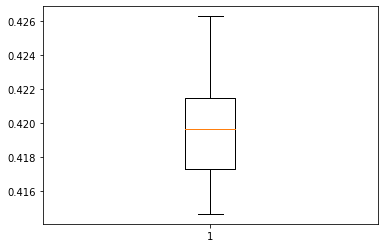

In [9]:
plt.boxplot(x_lrl1)

In [10]:
#moyenne des resultats
y_lrl1

0.4199535192563081

<BarContainer object of 9 artists>

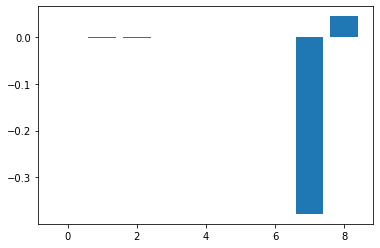

In [11]:
plt.bar(range(9), h_lrl1)

<BarContainer object of 42168 artists>

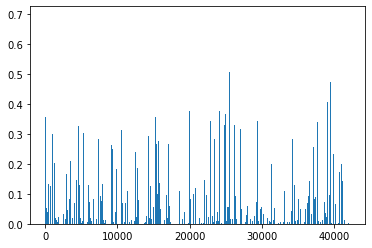

In [8]:
#distribution des probas
plt.bar(np.arange(len(proba_lrl1[:,1])), proba_lrl1[:,1])

In [12]:
table_lrl1

passe,0,1
row_0,,
0,39066.2,2933.4
1,89.8,78.6


In [7]:
#CALCUL DU RECALL, LA METRIQUE QUE L'ON VA COMPARER APRES L'OVERSAMPLING

recall = table_lrl1.iloc[1][1] / (table_lrl1.iloc[1][1] + table_lrl1.iloc[0][1])
recall

0.02453519256308101

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA REGRESSION LOGISTIQUE L2

In [16]:
x_lrl2, y_lrl2, z_lrl2, h_lrl2, proba_lrl2 = regression_logistique_l2(10, 0.7)

In [17]:
x_lrl2

array([0.4123506 , 0.42297477, 0.40737052, 0.40537849, 0.4252988 ,
       0.42463479, 0.41699867, 0.40903054, 0.42928287, 0.4000664 ])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef7e98a0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef7e98a780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef7e9b4d68>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef7e98ae10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef7e9bd198>],
 'means': []}

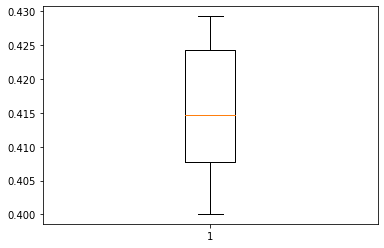

In [18]:
plt.boxplot(x_lrl2)

In [19]:
#moyenne des resultats
y_lrl2

0.41533864541832666

<BarContainer object of 9 artists>

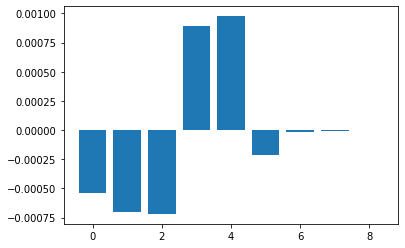

In [20]:
#moyenne des coeffs
plt.bar(range(9), h_lrl2)

<BarContainer object of 42168 artists>

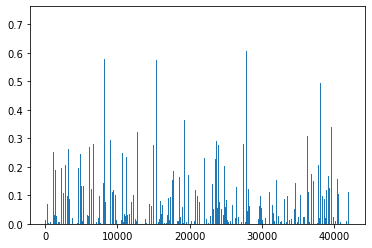

In [31]:
#distribution des probas
plt.bar(np.arange(len(proba_lrl2[:,1])), proba_lrl2[:,1])

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA Random Forest

In [2]:
x_rf, y_rf, z_rf, h_rf, proba_rf, table_rf = RandomForest (10, 0.7)

In [3]:
x_rf

array([0.43824701, 0.43525896, 0.43459495, 0.43857902, 0.43492696,
       0.44223108, 0.42430279, 0.4252988 , 0.43027888, 0.43525896])

{'whiskers': [<matplotlib.lines.Line2D at 0x191451c49b0>,
 'caps': [<matplotlib.lines.Line2D at 0x191451c4eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x191451c4470>],
 'medians': [<matplotlib.lines.Line2D at 0x191451d9a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x191451d9eb8>],
 'means': []}

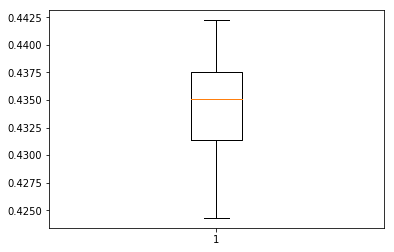

In [4]:
plt.boxplot(x_rf)

In [5]:
#moyenne des resultats
y_rf

0.4338977423638778

<BarContainer object of 9 artists>

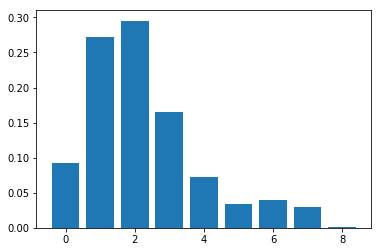

In [6]:
#coeffs
plt.bar(range(9),h_rf)

<BarContainer object of 42168 artists>

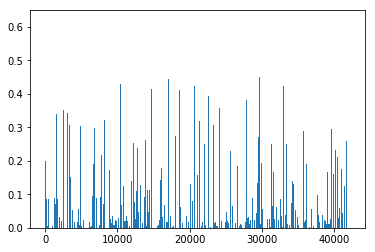

In [7]:
#distribution des probas
plt.bar(np.arange(len(proba_rf[:,1])), proba_rf[:,1])

<font color = 'blue'>
    Ici on regarde les résutats du gradient boosting

In [2]:
x_gb, y_gb, z_gb, h_gb, proba_gb, table_gb = GradientBoosting (10, 0.7)

['Unnamed: 0', 'sender_id', 'receiver_id', 'receveur_potentiel', 'passe', 'passe_id', 'score1_distance', 'score2', 'score3', 'score4', 'premiere_distance_receveur', 'seconde_distance_receveur', 'premiere_distance_sender', 'seconde_distance_sender', 'distance_ligne_passe', 'adversaire_dans_cone', 'Direction_Passe']


In [3]:
table_gb

passe,0,1
row_0,,
0,39147.4,2999.0
1,8.6,13.0


In [4]:
x_gb

array([0.42131474, 0.43625498, 0.43160691, 0.43824701, 0.42197875,
       0.43426295, 0.4312749 , 0.42596282, 0.44090305, 0.43359894])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8d2231f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8d2242c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8d2231e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8d22504a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8d22508d0>],
 'means': []}

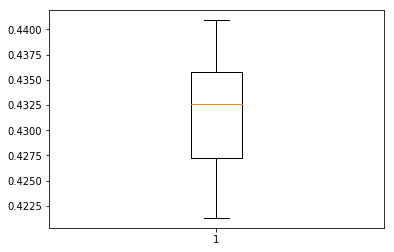

In [5]:
plt.boxplot(x_gb)

In [6]:
#moyenne des resultats
y_gb

0.43154050464807436

<BarContainer object of 9 artists>

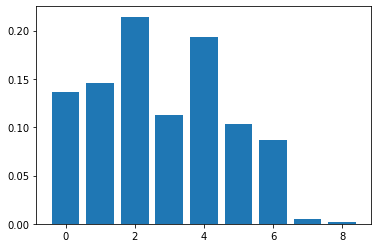

In [37]:
#coeffs
plt.bar(range(9),h_gb)

<BarContainer object of 42168 artists>

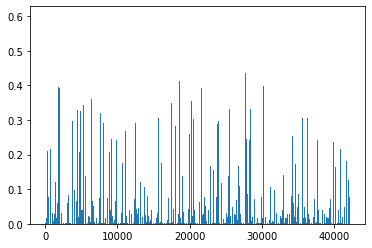

In [41]:
#distribution des probas
plt.bar(np.arange(len(proba_gb[:,1])), proba_gb[:,1])

<font color = 'blue'>
Ici on compare toutes les méthodes entre elles avec les boxplots  

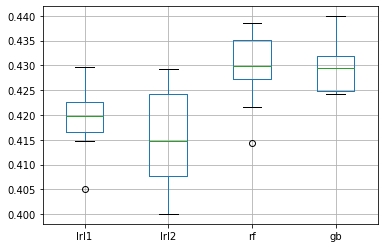

In [38]:
df = np.zeros((10,4))
df[:,0] = x_lrl1
df[:,1] = x_lrl2
df[:,2] = x_rf
df[:,3] = x_gb
dataframe_method = pd.DataFrame(df, columns = ["lrl1", "lrl2", "rf", "gb"])
dataframe_method.boxplot(return_type = 'dict')
plt.show()

<font color = 'blue'>
Maintenant on regarde ce que cela donne en centrant les variables quantitatives. 

<font color = 'blue'>
regression l1 : 

In [2]:
x_lrl1, y_lrl1, z_lrl1, h_lrl1, proba_lrl1, table_lrl1 = regression_logistique (10, 0.7)

In [3]:
y_lrl1

0.4120517928286852

{'whiskers': [<matplotlib.lines.Line2D at 0x2e4c0ca76a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e4c0ca7d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e4aff2f3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2e4c0cc1400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e4c0cc1748>],
 'means': []}

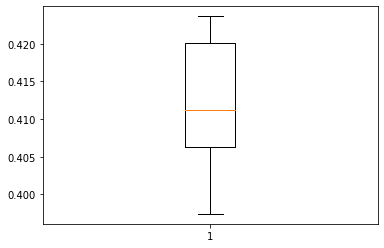

In [4]:
plt.boxplot(x_lrl1)

<BarContainer object of 9 artists>

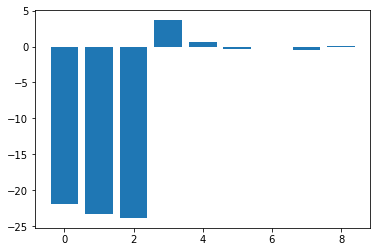

In [5]:
plt.bar(range(9), h_lrl1)

In [6]:
table_lrl1

passe,0,1
row_0,,
0,39064.8,2938.9
1,91.2,73.1


In [ ]:
plt.bar(np.arange(len(proba_gb[:,1])), proba_lrl1[:,1])

<font color ='blue'>
regression l2

In [7]:
x_lrl2, y_lrl2, z_lrl2, h_lrl2, proba_lrl2 = regression_logistique_l2 (10, 0.7)

In [8]:
y_lrl2

0.41152058432934924

{'whiskers': [<matplotlib.lines.Line2D at 0x2e4c0de8860>,
 'caps': [<matplotlib.lines.Line2D at 0x2e4c0de8ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e4c0de8550>],
 'medians': [<matplotlib.lines.Line2D at 0x2e4c0df55c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e4c0df5908>],
 'means': []}

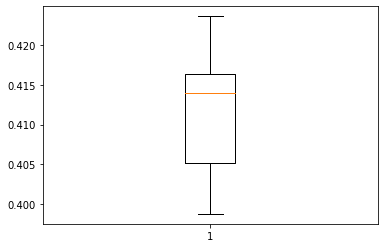

In [9]:
plt.boxplot(x_lrl2)

<BarContainer object of 9 artists>

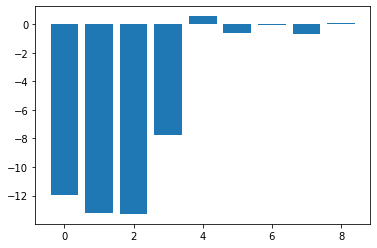

In [10]:
plt.bar(range(9), h_lrl2)

In [ ]:
plt.bar(np.arange(len(proba_gb[:,1])), proba_lrl2[:,1])

<font color ='blue'>
random forest

In [11]:
x_rf, y_rf, z_rf, h_rf, proba_rf = RandomForest (10, 0.7)

In [12]:
y_rf

0.4317065073041168

{'whiskers': [<matplotlib.lines.Line2D at 0x2e4c13778d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e4c1377fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e4c1377780>],
 'medians': [<matplotlib.lines.Line2D at 0x2e4c1381630>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e4c1381978>],
 'means': []}

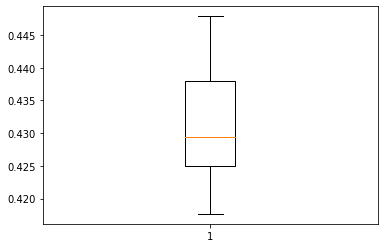

In [13]:
plt.boxplot(x_rf)

<BarContainer object of 9 artists>

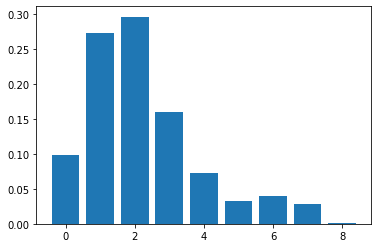

In [14]:
plt.bar(range(9), h_rf)

In [ ]:
plt.bar(np.arange(len(proba_gb[:,1])), proba_rf[:,1])

<font color = 'blue'>
gradient boosting

In [15]:
x_gb, y_gb, z_gb, h_gb, proba_gb = GradientBoosting (10, 0.7)

['Unnamed: 0', 'sender_id', 'receiver_id', 'receveur_potentiel', 'passe', 'passe_id', 'score1_distance', 'score2', 'score3', 'score4', 'premiere_distance_receveur', 'seconde_distance_receveur', 'premiere_distance_sender', 'seconde_distance_sender', 'distance_ligne_passe', 'adversaire_dans_cone', 'Direction_Passe']


In [16]:
y_gb

0.4290836653386454

{'whiskers': [<matplotlib.lines.Line2D at 0x2e4c0f5f5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e4c0f5fc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e4c0f5f2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e4c0f6a320>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e4c0f6a668>],
 'means': []}

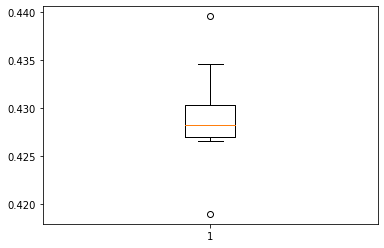

In [17]:
plt.boxplot(x_gb)

<BarContainer object of 9 artists>

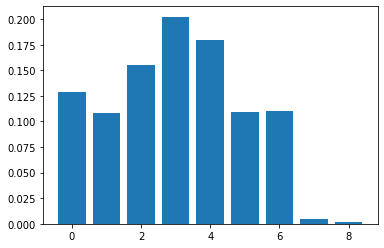

In [18]:
plt.bar(range(9), h_gb)

In [ ]:
plt.bar(np.arange(len(proba_gb[:,1])), proba_gb[:,1])

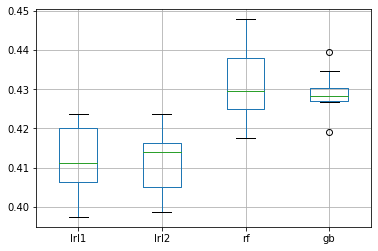

In [22]:
#boxplots pour comparer les méthodes 
df = np.zeros((10,4))
df[:,0] = x_lrl1
df[:,1] = x_lrl2
df[:,2] = x_rf
df[:,3] = x_gb
dataframe_method = pd.DataFrame(df, columns = ["lrl1", "lrl2", "rf", "gb"])
dataframe_method.boxplot(return_type = 'dict')
plt.show()

<font color = 'blue'>
Maintenant on regarde avec de l'oversampling

In [2]:
x_lrl1OV, y_lrl1OV, z_lrl1OV, h_lrl1OV, proba_lrl1OV, table_lrl1OV = regression_logistique_OverSamp (10, 0.7)

In [3]:
x_lrl2OV, y_lrl2OV, z_lrl2OV, h_lrl2OV, proba_lrl2OV, table_lrl2OV = regression_logistique_L2_OverSamp (10, 0.7)

In [4]:
x_rfOV, y_rfOV, z_rfOV, h_rfOV, proba_rfOV, table_rfOV = RandomForest_OverSamp (10, 0.7)

In [5]:
x_gbOV, y_gbOV, z_gbOV, h_gbOV, proba_gbOV, table_gbOV = GradientBoosting_OverSamp (10, 0.7)

In [6]:
x_lrl1OV

array([0.27954847, 0.26328021, 0.27722444, 0.28486056, 0.2626162 ,
       0.26593625, 0.27788845, 0.26427623, 0.27124834, 0.26925631])

{'whiskers': [<matplotlib.lines.Line2D at 0x219c138f940>,
 'caps': [<matplotlib.lines.Line2D at 0x219c13a32b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x219c138f7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x219c13a3b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x219c13a3f28>],
 'means': []}

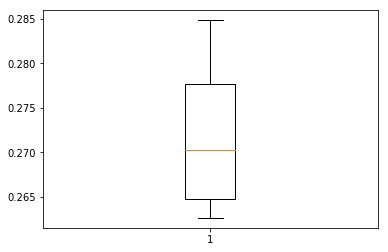

In [7]:
plt.boxplot(x_lrl1OV)

In [8]:
#moyenne des resultats
y_lrl1OV

0.2716135458167331

<BarContainer object of 42168 artists>

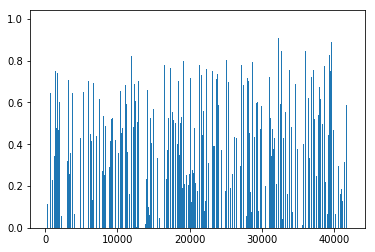

In [9]:
#distribution des probas
plt.bar(np.arange(len(proba_lrl1OV[:,1])), proba_lrl1OV[:,1])

In [10]:
table_lrl1OV

passe,0,1
row_0,,
0,28580.7,542.0
1,10575.3,2470.0


In [11]:
#CALCUL DU RECALL, LA METRIQUE QUE L'ON VA COMPARER APRES L'OVERSAMPLING

recallOV = table_lrl1OV.iloc[1][1] / (table_lrl1OV.iloc[1][1] + table_lrl1OV.iloc[0][1])
recallOV

0.8200531208499336

<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA REGRESSION LOGISTIQUE L2 Oversamplé


In [12]:
x_lrl2OV

array([0.27257636, 0.26992032, 0.27324037, 0.28452855, 0.2752324 ,
       0.2752324 , 0.26294821, 0.27224436, 0.33300133, 0.26925631])

{'whiskers': [<matplotlib.lines.Line2D at 0x219c18bb5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x219c1915b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x219c18b03c8>],
 'medians': [<matplotlib.lines.Line2D at 0x219c1971208>],
 'fliers': [<matplotlib.lines.Line2D at 0x219c19995f8>],
 'means': []}

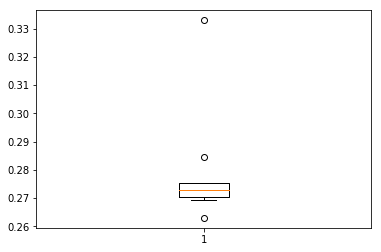

In [13]:
plt.boxplot(x_lrl2OV)

In [14]:
#moyenne des resultats
y_lrl2OV

0.2788180610889774

<BarContainer object of 9 artists>

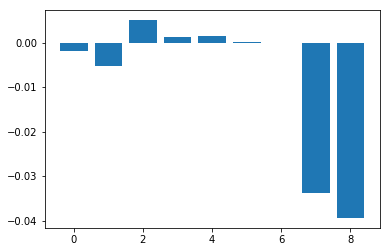

In [15]:
#moyenne des coeffs
plt.bar(range(9), h_lrl2OV)

<BarContainer object of 42168 artists>

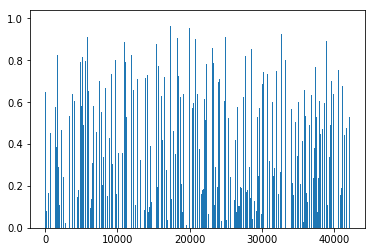

In [14]:
#distribution des probas
plt.bar(np.arange(len(proba_lrl2OV[:,1])), proba_lrl2OV[:,1])

In [16]:
table_lrl2OV

passe,0,1
row_0,,
0,28929.2,590.5
1,10226.8,2421.5


<font color='blue'>
 ICI ON REGARDE NOS RESULTATS DE LA Random Forest OV

In [17]:
x_rfOV

array([0.40172643, 0.40371846, 0.39608234, 0.38512616, 0.37782205,
       0.3877822 , 0.38711819, 0.38047809, 0.39010624, 0.37682603])

{'whiskers': [<matplotlib.lines.Line2D at 0x219c27d1748>,
 'caps': [<matplotlib.lines.Line2D at 0x219c282cc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x219c27c7518>],
 'medians': [<matplotlib.lines.Line2D at 0x219c288a6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x219c28b0748>],
 'means': []}

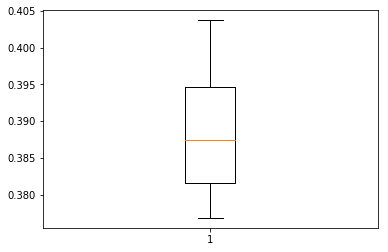

In [18]:
plt.boxplot(x_rfOV)

In [19]:
#moyenne des resultats
y_rfOV

0.3886786188579017

<BarContainer object of 9 artists>

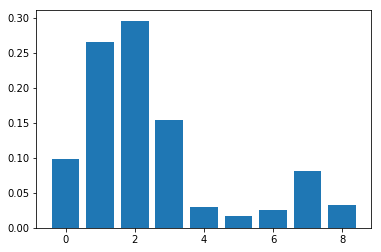

In [20]:
#coeffs
plt.bar(range(9),h_rfOV)

<BarContainer object of 42168 artists>

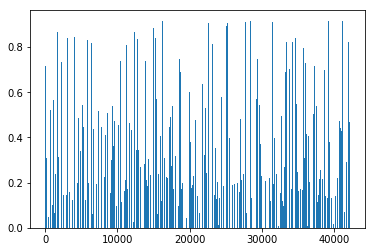

In [19]:
#distribution des probas
plt.bar(np.arange(len(proba_rfOV[:,1])), proba_rfOV[:,1])

In [21]:
table_rfOV

passe,0,1
row_0,,
0,30793.2,609.3
1,8362.8,2402.7


<font color = 'blue'>
    Ici on regarde les résutats du gradient boosting Oversampled

In [22]:
x_gbOV

array([0.39508632, 0.38612218, 0.38247012, 0.37649402, 0.40106242,
       0.39043825, 0.37948207, 0.39143426, 0.38413015, 0.37416999])

{'whiskers': [<matplotlib.lines.Line2D at 0x219c3623e48>,
 'caps': [<matplotlib.lines.Line2D at 0x219c36886d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x219c3619908>],
 'medians': [<matplotlib.lines.Line2D at 0x219c36dbac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x219c3702e48>],
 'means': []}

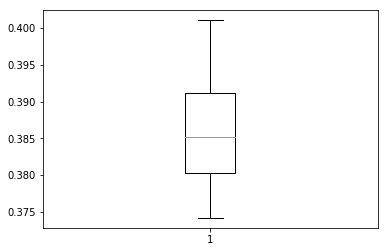

In [23]:
plt.boxplot(x_gbOV)

In [24]:
#moyenne des resultats
y_gbOV

0.3860889774236388

<BarContainer object of 9 artists>

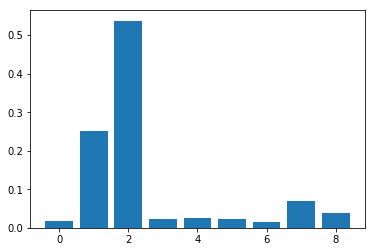

In [25]:
#coeffs
plt.bar(range(9),h_gbOV)

<BarContainer object of 42168 artists>

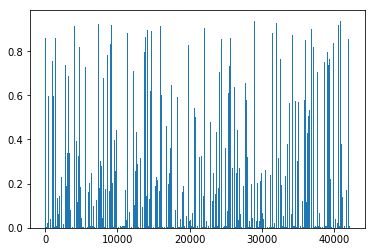

In [24]:
#distribution des probas
plt.bar(np.arange(len(proba_gbOV[:,1])), proba_gbOV[:,1])

In [27]:
table_gbOV

passe,0,1
row_0,,
0,30805.5,624.3
1,8350.5,2387.7


<font color = 'blue'>
Ici on compare toutes les méthodes entre elles avec les boxplots  

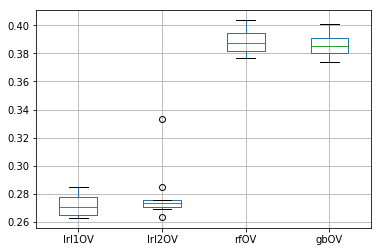

In [26]:
df = np.zeros((10,4))
df[:,0] = x_lrl1OV
df[:,1] = x_lrl2OV
df[:,2] = x_rfOV
df[:,3] = x_gbOV
dataframe_method = pd.DataFrame(df, columns = ["lrl1OV", "lrl2OV", "rfOV", "gbOV"])
dataframe_method.boxplot(return_type = 'dict')
plt.show()

<font color = 'blue'>
Maintenant on regarde ce que cela donne en centrant les variables quantitatives et en oversamplant. 

<font color = 'blue'>
regression l1 : 

In [28]:
x_lrl1OVC, y_lrl1OVC, z_lrl1OVC, h_lrl1OVC, proba_lrl1OVC, table_lrl1OVC = regression_logistique_OverSamp (10, 0.7, True)

In [29]:
y_lrl1OVC

0.3657038512616202

{'whiskers': [<matplotlib.lines.Line2D at 0x219c6491908>,
 'caps': [<matplotlib.lines.Line2D at 0x219c64eee48>,
 'boxes': [<matplotlib.lines.Line2D at 0x219c64876d8>],
 'medians': [<matplotlib.lines.Line2D at 0x219c6549588>],
 'fliers': [<matplotlib.lines.Line2D at 0x219c6572908>],
 'means': []}

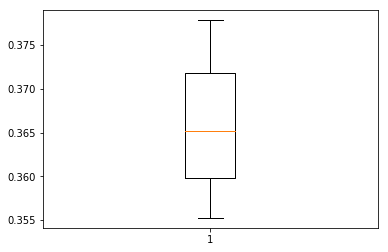

In [30]:
plt.boxplot(x_lrl1OVC)

<BarContainer object of 9 artists>

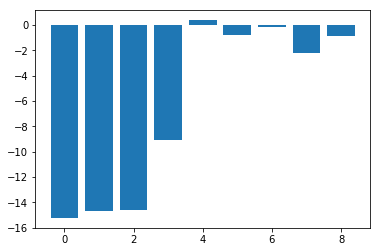

In [31]:
plt.bar(range(9), h_lrl1OVC)

In [32]:
table_lrl1OVC

passe,0,1
row_0,,
0,31669.1,867.3
1,7486.9,2144.7


<BarContainer object of 42168 artists>

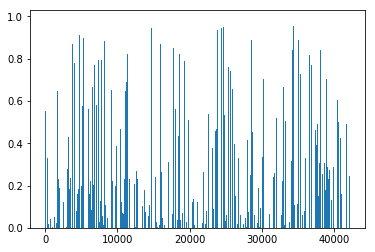

In [34]:
plt.bar(np.arange(len(proba_lrl1OVC[:,1])), proba_lrl1OVC[:,1])

In [35]:
table_lrl1OVC

passe,0,1
row_0,,
0,31669.1,867.3
1,7486.9,2144.7


<font color ='blue'>
regression l2

In [36]:
x_lrl2OVC, y_lrl2OVC, z_lrl2OVC, h_lrl2OVC, proba_lrl2OVC, table_lrl2OVC = regression_logistique_L2_OverSamp (10, 0.7, True)

In [37]:
y_lrl2OVC

0.34392430278884467

{'whiskers': [<matplotlib.lines.Line2D at 0x219ce78de48>,
 'caps': [<matplotlib.lines.Line2D at 0x219ced88748>,
 'boxes': [<matplotlib.lines.Line2D at 0x219ce6b5c88>],
 'medians': [<matplotlib.lines.Line2D at 0x219d02b8908>],
 'fliers': [<matplotlib.lines.Line2D at 0x219d0564e48>],
 'means': []}

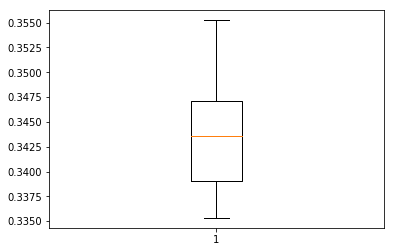

In [38]:
plt.boxplot(x_lrl2OVC)

<BarContainer object of 9 artists>

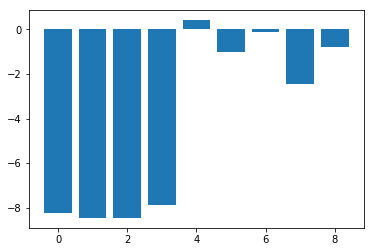

In [39]:
plt.bar(range(9), h_lrl2OVC)

<BarContainer object of 42168 artists>

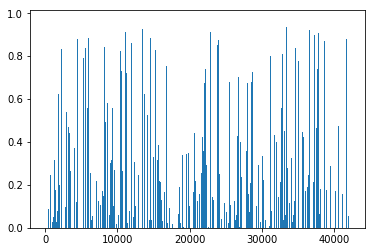

In [40]:
plt.bar(np.arange(len(proba_lrl2OVC[:,1])), proba_lrl2OVC[:,1])

In [41]:
table_lrl2OVC

passe,0,1
row_0,,
0,31743.2,957.9
1,7412.8,2054.1


<font color ='blue'>
random forest

In [42]:
x_rfOVC, y_rfOVC, z_rfOVC, h_rfOVC, proba_rfOVC, table_rfOVC = RandomForest_OverSamp (10, 0.7, True)

In [43]:
y_rfOVC

0.3652390438247012

{'whiskers': [<matplotlib.lines.Line2D at 0x219e8f65eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x219e9560748>,
 'boxes': [<matplotlib.lines.Line2D at 0x219e8eb7588>],
 'medians': [<matplotlib.lines.Line2D at 0x219e9ac1588>],
 'fliers': [<matplotlib.lines.Line2D at 0x219e9f94748>],
 'means': []}

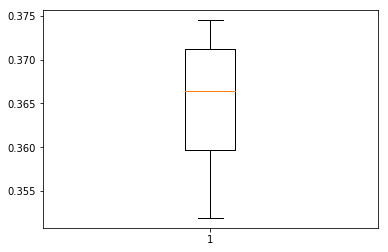

In [44]:
plt.boxplot(x_rfOVC)

<BarContainer object of 9 artists>

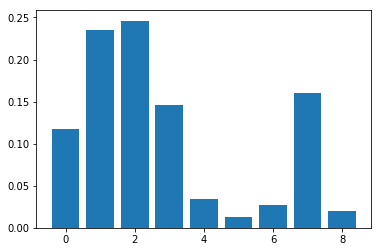

In [45]:
plt.bar(range(9), h_rfOVC)

<BarContainer object of 42168 artists>

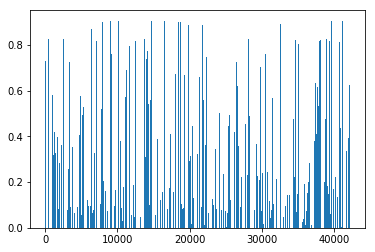

In [47]:
plt.bar(np.arange(len(proba_rfOVC[:,1])), proba_rfOVC[:,1])

In [48]:
table_rfOVC

passe,0,1
row_0,,
0,31971.6,826.2
1,7184.4,2185.8


<font color = 'blue'>
gradient boosting

In [49]:
x_gbOVC, y_gbOVC, z_gbOVC, h_gbOVC, proba_gbOVC, table_gbOVC = GradientBoosting_OverSamp (10, 0.7, True)

In [50]:
y_gbOVC

0.3568061088977424

{'whiskers': [<matplotlib.lines.Line2D at 0x2198915e3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x21989750908>,
 'boxes': [<matplotlib.lines.Line2D at 0x21989086518>],
 'medians': [<matplotlib.lines.Line2D at 0x21989cb1da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21989f673c8>],
 'means': []}

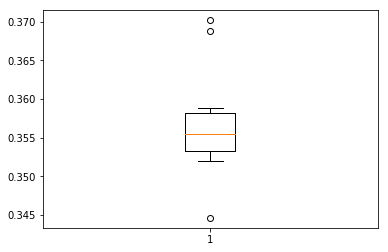

In [51]:
plt.boxplot(x_gbOVC)

<BarContainer object of 9 artists>

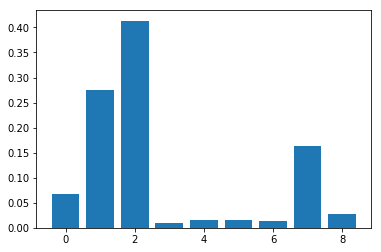

In [52]:
plt.bar(range(9), h_gbOVC)

<BarContainer object of 42168 artists>

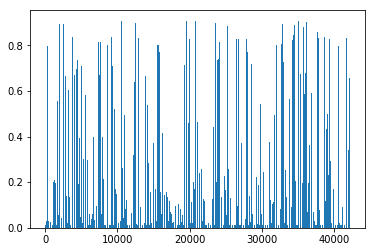

In [54]:
plt.bar(np.arange(len(proba_gbOVC[:,1])), proba_gbOVC[:,1])

In [55]:
table_gbOVC

passe,0,1
row_0,,
0,31768.1,839.9
1,7387.9,2172.1


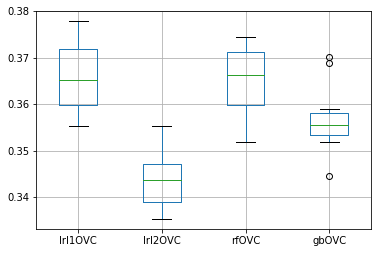

In [57]:
#boxplots pour comparer les méthodes 
df = np.zeros((10,4))
df[:,0] = x_lrl1OVC
df[:,1] = x_lrl2OVC
df[:,2] = x_rfOVC
df[:,3] = x_gbOVC
dataframe_method = pd.DataFrame(df, columns = ["lrl1OVC","lrl2OVC", "rfOVC", "gbOVC"])
dataframe_method.boxplot(return_type = 'dict')
plt.show()